# What makes a good movie?

Our stakeholder **Microsoft** has asked us to explore what different types of films are currently doing best at the box office so that they can make better decisions on what types of films to create.

## Abstract

Stakeholders looking to create profitable movie titles could use this paper to identify what movie genres, and directors (if any) are most likely to provide a healthy return on investment. We address what addtributes successful movie titles have had over the last decade by applying a qualitative analysis to data gathered from IMDb's public database available for download at `https://datasets.imdbws.com`

IMDb is an online database of  information related to films, television programs, home videos, video games, and streaming content onlineand is now owned and operated by Amazon.com so the accuracy of this data can be trusted with a high degree of certainty.

The scope of this our analysis is limited to two axes of examination, profits revenues and roi as they relate to movie genres, both foreign and domestic, and profits revenues and roi as they relate to director.

### How did we process our data?

We decided to use data cleaning note book separately of this paper to reduce pysical ram requirements and to streamline this paper. For a step by step run down on the processing of the data.



## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#this feature reads the cleaned data file contained in the Data directory
df = pd.read_csv('final-data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1311 non-null   object 
 1   movie              1311 non-null   object 
 2   production_budget  1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   worldwide_gross    1311 non-null   int64  
 5   foreign_gross      1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   release_year       1311 non-null   int64  
 8   genres             1311 non-null   object 
 9   director           1311 non-null   object 
 10  roi_domestic       1311 non-null   float64
 11  roi_foreign        1311 non-null   float64
 12  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 133.3+ KB


## Data Understanding

All features in this analysis use the same dataset provided by our `Data/data-clean.ipynb` file which processes the raw data from zip format into a more readily usable csv file.

Each of our 1311 recrods contains information about the movie's year of release, production budget, gross revenues both foreign and domestic, profit, ROI, and director.

In [3]:
df[['production_budget','worldwide_gross','profit','roi_worldwide']].describe()

production_budget  worldwide_gross        profit  roi_worldwide
count       1.311000e+03     1.311000e+03  1.311000e+03    1311.000000
mean        4.535077e+07     1.443545e+08  9.900370e+07     270.736950
std         5.700625e+07     2.399941e+08  1.985670e+08    1267.217927
min         1.500000e+04     0.000000e+00 -2.002376e+08    -100.000000
25%         8.000000e+06     7.631223e+06 -9.080450e+05     -33.866839
50%         2.500000e+07     5.180076e+07  2.295647e+07     111.524436
75%         5.800000e+07     1.607652e+08  1.083781e+08     303.565585
max         4.106000e+08     2.048134e+09  1.748134e+09   41556.474000

### Business Question 1: Which genres of movies can expect a higher Return on Investment?

Based on our business problem, we decided to first examine which genres these new films should be. We chose to do this by calculating the average return on investment for each genre and pulled the top 5 genres.

>We've chosen to use median because the data contains many outliers which would make the mean a non-optimal measure of central tendency. We'll be choosing the top 5 genres based on their worlwide ROI, since this is a better indication of each films total ROI.

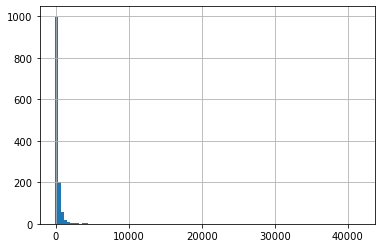

In [4]:
df['roi_worldwide'].hist(bins=100);

###### Now with that said, we examine the median ROI for each genre. 


In [5]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
genres_exp = df.explode('genres')
unique_genres = list(genres_exp['genres'].unique())

#We create a new dataframe that displays median by genre in descending order
genres_gb = genres_exp.groupby('genres').median().sort_values(by=['roi_worldwide'], ascending = False)

#take the top five and roi_worldwide
top_5_genres_roi = genres_gb[['roi_worldwide']].head(5)
top_5_genres_roi

roi_worldwide
genres                  
Mystery       227.818077
Animation     198.188978
Musical       173.752303
Sci-Fi        168.386218
Adventure     162.363957

> ##### Great, let's see the  median worldwide roi's visually

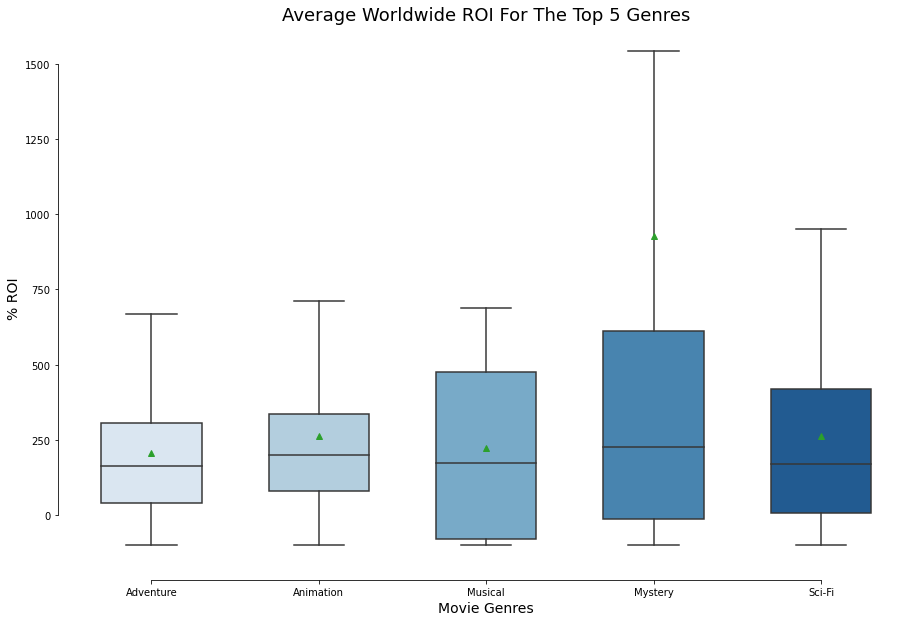

In [6]:
#creating an individual dataframe for each genre in my genres_gb dataframe
genres=genres_exp['genres'].unique().tolist()
musical = genres_exp.loc[genres_exp.genres=='Musical']
mystery = genres_exp.loc[genres_exp.genres=='Mystery']
scifi = genres_exp.loc[genres_exp.genres=='Sci-Fi']
adventure = genres_exp.loc[genres_exp.genres=='Adventure']
animation = genres_exp.loc[genres_exp.genres=='Animation']

#create a new dataframe with the top five average roi worldwide
top_5_ww = adventure.append(animation)
top_5_ww = top_5_ww.append(musical)
top_5_ww = top_5_ww.append(mystery)
top_5_ww = top_5_ww.append(scifi)

#create a box plot with all 5 top genres comparing median and mean
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_ww["genres"], 
            y=top_5_ww["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);


plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI For The Top 5 Genres", size=18)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Hide the vertical gridlines

sns.despine(offset=10, trim=True)
plt.show()

### Editors Note ^ we need a legend to correctly identify what the triangle represents

In [7]:
#let's predict worst, base, and best case scenarios for each genre
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = musical['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Musical ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 41% 
  Base Case = 162% 
  Best Case = 305%
Animation ROI: 
  Worst Case = 78% 
  Base Case = 198% 
  Best Case = 335%
Musical ROI: 
  Worst Case = -78% 
  Base Case = 173% 
  Best Case = 474%
Mystery ROI: 
  Worst Case = -13% 
  Base Case = 227% 
  Best Case = 613%
Sci-fi ROI: 
  Worst Case = 5% 
  Base Case = 168% 
  Best Case = 420%


In [8]:
#creating a boxplot with the median and IDR for each genre
#fig_dims = (20, 14)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.boxplot( y=genres_exp["genres"], 
 #           x=genres_exp["roi_worldwide"], 
  #          palette="Blues", 
   #         width=0.6, 
            #removing outliers
    #        showfliers = False,
            #adding a green dot that shows mean for each genre
     #       showmeans = True);

#creating labels for my boxplot
#plt.xlabel("% ROI", size=14)
#plt.ylabel("Movie Genres", size=14)
#plt.title("Average Worldwide ROI By Genre", size=18)
#plt.show()

We next decided to take a look at how each genre performed domestically, to see if it was necessary to release films in foreign countries. We were also curious to know if the top 5 genres in the USA were different than the top 5 genres worldwide

In [9]:
#fig_dims = (20, 14)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.boxplot( y=genres_exp["genres"], 
#            x=genres_exp["roi_domestic"], 
#            palette="Blues", 
#            width=0.6, 
#            showfliers = False, 
#            showmeans=True);

#plt.xlabel("% ROI", size=14)
#plt.ylabel("Movie Genres", size=14)
#plt.title("Average Domestic ROI By Genre", size=18)
#plt.show()

In [10]:
genres_gb_dom = genres_exp.groupby('genres').median()
genres_gb_dom = genres_gb.sort_values(by=['roi_domestic'], ascending = False)
genres_gb_dom[['roi_domestic']].head(5)

roi_domestic
genres                 
Mystery       56.965319
Music         20.438264
Comedy        11.473743
Romance       10.848518
Animation      5.784405

>It looks like our top 5 genres in the USA are different from our top 5 genres in the world. Only two genres (mystery and animation) are in the top 5 for domestic and worlwide ROI. 

We next wanted to see the worst, base, and best case ROI for the top 5 genres in the USA

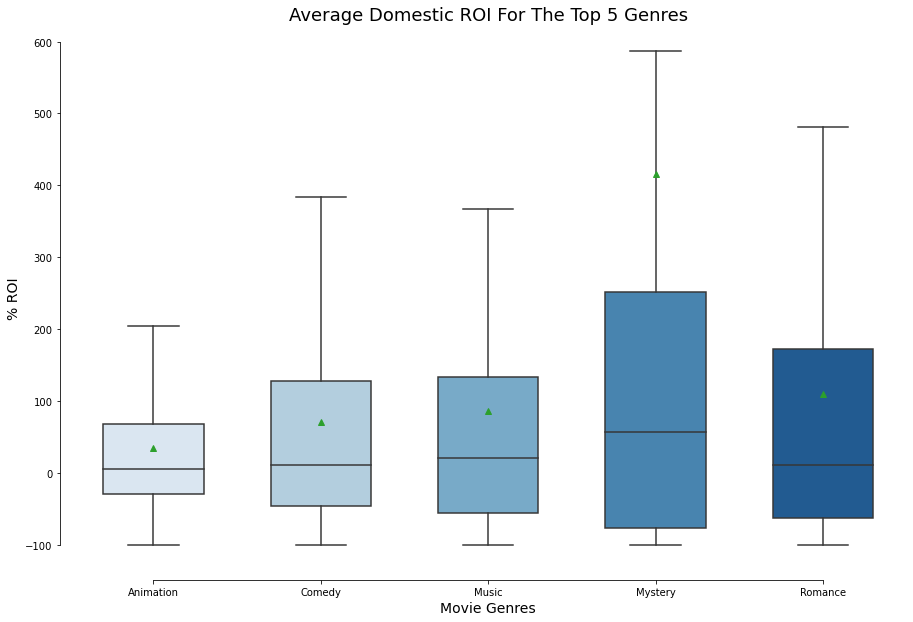

In [11]:
comedy = genres_exp.loc[genres_exp.genres=='Comedy']
music = genres_exp.loc[genres_exp.genres=='Music']
romance = genres_exp.loc[genres_exp.genres=='Romance']

top_5_df_domestic= animation.append(comedy)
top_5_df_domestic = top_5_df_domestic.append(music)
top_5_df_domestic = top_5_df_domestic.append(mystery)
top_5_df_domestic = top_5_df_domestic.append(romance)

#created a box plot with top 5 genres in roi_domestic based on median
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_df_domestic["genres"], 
            y=top_5_df_domestic["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True,
            data=top_5_df_domestic.groupby('roi_domestic', as_index=False).median());

plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Domestic ROI For The Top 5 Genres", size=18)
#sns.stripplot(x="genres", y="roi_domestic", data=top_5_df_domestic)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(offset=10, trim=True)
plt.show()

In [12]:
#let's predict worst, base, and best case scenarios for each genre
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = music['roi_domestic']
arr4 = mystery['roi_domestic']
arr5 = romance['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Romance ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -28% 
  Base Case = 5% 
  Best Case = 68%
Comedy ROI: 
  Worst Case = -45% 
  Base Case = 11% 
  Best Case = 127%
Music ROI: 
  Worst Case = -55% 
  Base Case = 20% 
  Best Case = 133%
Mystery ROI: 
  Worst Case = -76% 
  Base Case = 56% 
  Best Case = 252%
Romance ROI: 
  Worst Case = -61% 
  Base Case = 10% 
  Best Case = 172%


### Business Recommendation 1: 

##### From what we see in the graphs above and based on worst, base, and best case scenarios for each genre, we should create films in the adventure and animation genres. 

>Although their best case ROI predictions are not as high as the mystery and musical genres, their worst case ROI predications are both far above 0%. All movies, no matter the genre, should be released worldwide and not just domestically, the worst case ROI predictions for each of the top 5 genres with highest average domestic ROI is below -25%.

### Business Reccomendation 2: Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?

In [13]:
genres_exp['genres'].value_counts()

Drama          635
Comedy         439
Action         402
Adventure      318
Thriller       234
Crime          208
Horror         163
Romance        146
Biography      123
Sci-Fi         123
Mystery        115
Fantasy        105
Animation       94
Family          72
Music           41
History         40
Documentary     31
Sport           30
War             15
Western          9
Musical          6
Name: genres, dtype: int64

In [14]:
# determine top 5 genres (ROI-worldwide) by creating a new dataframe
top_5_genres_roi = genres_exp[['genres', 'roi_domestic', 'roi_foreign','roi_worldwide']].copy()
top_5_genres_roi.head()

genres  roi_domestic  roi_foreign  roi_worldwide
0     Action    -41.289850    95.957136     154.667286
0  Adventure    -41.289850    95.957136     154.667286
0    Fantasy    -41.289850    95.957136     154.667286
1     Action    -87.782186   -69.428571     -57.210757
1  Adventure    -87.782186   -69.428571     -57.210757

In [15]:
# group dataframe by genres and calculate median
genres_gb = top_5_genres_roi.groupby('genres').median()
genres_gb

roi_domestic  roi_foreign  roi_worldwide
genres                                               
Action         -27.232784    16.524675     112.972852
Adventure       -8.951864    53.815107     162.363957
Animation        5.784405    83.082221     198.188978
Biography        1.899783   -32.746550      90.366885
Comedy          11.473743   -11.529117     144.709156
Crime          -18.558897   -32.529146      64.463095
Documentary    -91.717067   -99.909600     -47.225922
Drama          -15.519800   -35.324480      79.907329
Family           3.984882   -17.274336     105.511361
Fantasy        -24.974402    18.809743     110.232772
History        -42.607558   -13.636317      83.423130
Horror         -18.290033    10.571580     139.973975
Music           20.438264   -38.546933     128.700183
Musical        -49.429681    42.465095     173.752303
Mystery         56.965319    55.904993     227.818077
Romance         10.848518   -19.633567     133.868173
Sci-Fi          -8.206552    69.339398     168.386218
Sport            3.248234   -84.208358      50.384095
Thriller       -12.821121     6.816440     127.548173
War            -67.570195   -91.800956     -50.073420
Western        -84.812569   -63.827613     -48.640181

In [16]:
#get top genres sorted by WORLDWIDE ROI
roi_genres = genres_gb.sort_values(by=['roi_worldwide'], ascending = False)
roi_genres.head(10)

roi_domestic  roi_foreign  roi_worldwide
genres                                             
Mystery       56.965319    55.904993     227.818077
Animation      5.784405    83.082221     198.188978
Musical      -49.429681    42.465095     173.752303
Sci-Fi        -8.206552    69.339398     168.386218
Adventure     -8.951864    53.815107     162.363957
Comedy        11.473743   -11.529117     144.709156
Horror       -18.290033    10.571580     139.973975
Romance       10.848518   -19.633567     133.868173
Music         20.438264   -38.546933     128.700183
Thriller     -12.821121     6.816440     127.548173

In [17]:
#isolate top 5 genres (ROI Worldwide) from original dataframe
# am I calculating my ROI world wide wrong? SAMANTHA DIFF: HER COMEDY VS MY THRILLER

mystery_df = genres_exp.loc[(genres_exp['genres'] == 'Mystery')]

animation_df = genres_exp.loc[(genres_exp['genres'] == 'Animation')]

musical_df = genres_exp.loc[(genres_exp['genres'] == 'Musical')]

scifi_df = genres_exp.loc[(genres_exp['genres'] == 'Sci-Fi')]

adventure_df = genres_exp.loc[(genres_exp['genres'] == 'Adventure')]



In [18]:
#group by year
mys2 = mystery_df.groupby('release_year').median()

ani2 = animation_df.groupby('release_year').median()

mus2 = musical_df.groupby('release_year').median()

scifi2 = scifi_df.groupby('release_year').median()

adv2 = adventure_df.groupby('release_year').median()

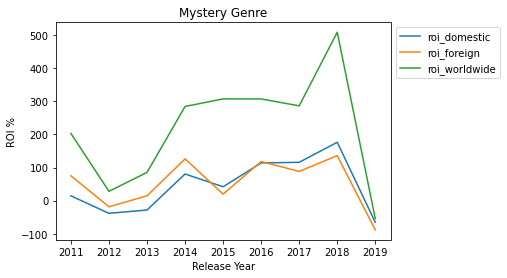

In [19]:
# plot the dataframes
mys2.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Mystery Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);


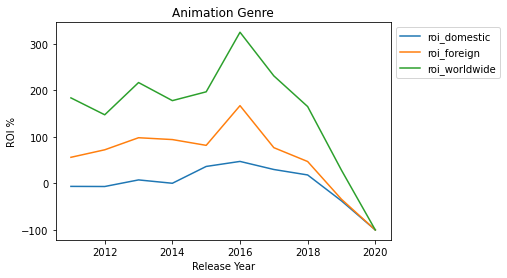

In [20]:
ani2.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Animation Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

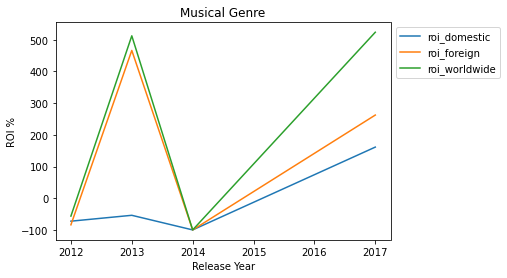

In [21]:
mus2.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Musical Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

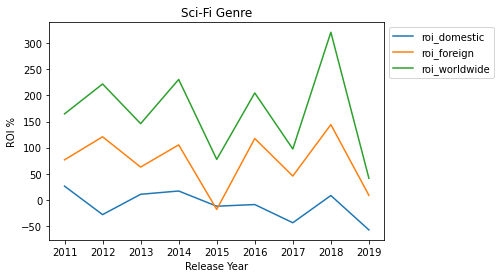

In [22]:
scifi2.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Sci-Fi Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

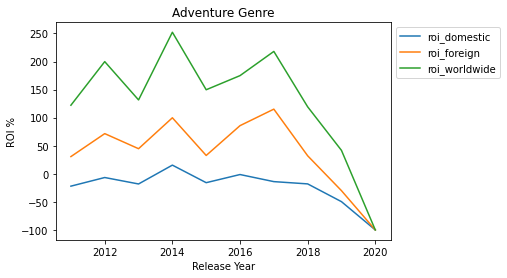

In [23]:
adv2.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Adventure Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

### Business Reccomendation 2:

##### The average ROI for the top 5 genres over the past decade shows that there is a bigger return on investment in the foreign market vs. domestic.
Based on this section of the analysis, Microsoft's movie studios should focus on producing Adventure, Sci-Fi, and Animation movies because of their greater foreign ROI potential.

>Adventure, Sci-Fi, Animation, and Musical movies performed better overseas than they did in the United States. The Mystery Genre's domestic and foreign ROI follow the same general positive trend over time. Each genre's domestic ROI hovers around 0% except for Mystery movies that generally maintains a postive trajectory. There are a few outliers in the musical and mystery genre, but the foreign ROI generally performs better than the domestic ROI. 

In [24]:
print(f'This cleaned data includes movies from {df.release_year.min()} to {df.release_year.max()}.')

This cleaned data includes movies from 2011 to 2020.


In [25]:
#D ropping unnessary columns for the 3rd question
df.drop(['release_year'],axis=1,inplace=True)

In [26]:
# Finding top 10 movies by 'worldwide_gross'
top10_worldwide = df.sort_values(by='worldwide_gross', ascending=False).head(10)
top10_worldwide = top10_worldwide.set_index('movie')
top10_worldwide

release_date  production_budget  \
movie                                                                 
Avengers: Infinity War 2018           2018-04-27          300000000   
Jurassic World 2015                   2015-06-12          215000000   
Furious 7 2015                        2015-04-03          190000000   
The Avengers 2012                     2012-05-04          225000000   
Avengers: Age of Ultron 2015          2015-05-01          330600000   
Black Panther 2018                    2018-02-16          200000000   
Jurassic World: Fallen Kingdom 2018   2018-06-22          170000000   
Frozen 2013                           2013-11-22          150000000   
Beauty and the Beast 2017             2017-03-17          160000000   
Incredibles 2 2018                    2018-06-15          200000000   

                                     domestic_gross  worldwide_gross  \
movie                                                                  
Avengers: Infinity War 2018               678815482       2048134200   
Jurassic World 2015                       652270625       1648854864   
Furious 7 2015                            353007020       1518722794   
The Avengers 2012                         623279547       1517935897   
Avengers: Age of Ultron 2015              459005868       1403013963   
Black Panther 2018                        700059566       1348258224   
Jurassic World: Fallen Kingdom 2018       417719760       1305772799   
Frozen 2013                               400738009       1272469910   
Beauty and the Beast 2017                 504014165       1259199706   
Incredibles 2 2018                        608581744       1242520711   

                                     foreign_gross      profit  \
movie                                                            
Avengers: Infinity War 2018             1369318718  1748134200   
Jurassic World 2015                      996584239  1433854864   
Furious 7 2015                          1165715774  1328722794   
The Avengers 2012                        894656350  1292935897   
Avengers: Age of Ultron 2015             944008095  1072413963   
Black Panther 2018                       648198658  1148258224   
Jurassic World: Fallen Kingdom 2018      888053039  1135772799   
Frozen 2013                              871731901  1122469910   
Beauty and the Beast 2017                755185541  1099199706   
Incredibles 2 2018                       633938967  1042520711   

                                                             genres  \
movie                                                                 
Avengers: Infinity War 2018             [Action, Adventure, Sci-Fi]   
Jurassic World 2015                     [Action, Adventure, Sci-Fi]   
Furious 7 2015                            [Action, Crime, Thriller]   
The Avengers 2012                       [Action, Adventure, Sci-Fi]   
Avengers: Age of Ultron 2015            [Action, Adventure, Sci-Fi]   
Black Panther 2018                      [Action, Adventure, Sci-Fi]   
Jurassic World: Fallen Kingdom 2018     [Action, Adventure, Sci-Fi]   
Frozen 2013                          [Adventure, Animation, Comedy]   
Beauty and the Beast 2017                [Family, Fantasy, Musical]   
Incredibles 2 2018                   [Action, Adventure, Animation]   

                                                        director  \
movie                                                              
Avengers: Infinity War 2018          [Anthony Russo,  Joe Russo]   
Jurassic World 2015                            [Colin Trevorrow]   
Furious 7 2015                                       [James Wan]   
The Avengers 2012                                  [Joss Whedon]   
Avengers: Age of Ultron 2015                       [Joss Whedon]   
Black Panther 2018                                [Ryan Coogler]   
Jurassic World: Fallen Kingdom 2018                [J.A. Bayona]   
Frozen 2013                          [Chris Buck,  Jennifer 

In [27]:
# Fiding top 10 movies by 'domestic_gross'
#top10_domestic = df.sort_values(by='domestic_gross', ascending=False).head(10)
#top10_domestic = top10_domestic.set_index('movie')
#top10_domestic

In [28]:
#fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
#ax.barh(top10_worldwide.index, top10_worldwide["worldwide_gross"])
#ax2.barh(top10_domestic.index, top10_domestic["domestic_gross"])

#ax.set_xlabel("Worldwide Gross")
#ax2.set_xlabel("Domestic Gross")
#ax.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020");
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

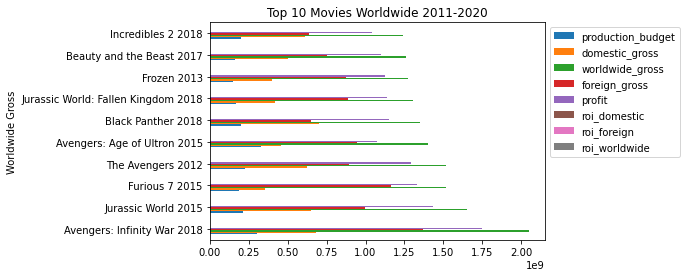

In [29]:
# Visualizing data (bar chart, stacked chart)
ax1 = top10_worldwide.plot(kind='barh')
#ax2 = top10_domestic.plot(kind='barh')        
ax1.set_ylabel("Worldwide Gross")
#ax2.set_ylabel("Domestic Gross")
ax1.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020")
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

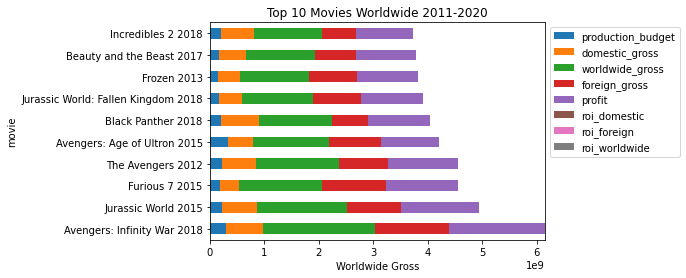

In [30]:
ax1 = top10_worldwide.plot(kind='barh', stacked=True, title='Top 10 Movies Worldwide 2011-2020')
#ax2 = top10_domestic.plot(kind='barh', stacked=True, title='Top 10 Movies Domestic 2011-2020')
ax1.set_xlabel("Worldwide Gross")
#ax2.set_xlabel("Domestic Gross")
ax1.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020")
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

In [31]:
### Answering Q3: Is there any particular director/producer who appears frequently in the above findings?

In [32]:
print(f"The directors who appear the most in 'the top 10 movies by worldwide gross' are {top10_worldwide['director'].value_counts().head(2)}.")

The directors who appear the most in 'the top 10 movies by worldwide gross' are [Joss Whedon]    2
[J.A. Bayona]    1
Name: director, dtype: int64.


In [33]:
### Finding correlation between directors' productivity and profit

In [34]:
# Making 'director' column to individaul director per row
#df['director'] = df['director'].map(lambda x: x.split(","))
individual_df = df.explode('director')
individual_df

release_date                                             movie  \
0      2011-05-20  Pirates of the Caribbean: On Stranger Tides 2011   
1      2019-06-07                                 Dark Phoenix 2019   
2      2015-05-01                      Avengers: Age of Ultron 2015   
3      2018-04-27                       Avengers: Infinity War 2018   
3      2018-04-27                       Avengers: Infinity War 2018   
...           ...                                               ...   
1306   2017-01-27                                        Emily 2017   
1307   2015-09-01                                       Exeter 2015   
1308   2015-12-01                                  Dutch Kills 2015   
1309   2011-11-25                                   The Ridges 2011   
1310   2014-12-31                         Stories of Our Lives 2014   

      production_budget  domestic_gross  worldwide_gross  foreign_gross  \
0             410600000       241063875       1045663875      804600000   
1             350000000        42762350        149762350      107000000   
2             330600000       459005868       1403013963      944008095   
3             300000000       678815482       2048134200     1369318718   
3             300000000       678815482       2048134200     1369318718   
...                 ...             ...              ...            ...   
1306              27000            3547             3547              0   
1307              25000               0           489792         489792   
1308              25000               0                0              0   
1309              17300               0                0              0   
1310              15000               0                0              0   

          profit                        genres         director  roi_domestic  \
0      635063875  [Action, Adventure, Fantasy]     Rob Marshall    -41.289850   
1     -200237650   [Action, Adventure, Sci-Fi]    Simon Kinberg    -87.782186   
2     1072413963   [Action, Adventure, Sci-Fi]      Joss Whedon     38.840250   
3     1748134200   [Action, Adventure, Sci-Fi]    Anthony Russo    126.271827   
3     1748134200   [Action, Adventure, Sci-Fi]        Joe Russo    126.271827   
...          ...                           ...              ...           ...   
1306      -23453                       [Drama]      Ryan Graves    -86.862963   
1307      464792   [Horror, Mystery, Thriller]    Marcus Nispel   -100.000000   
1308      -25000      [Crime, Drama, Thriller]  Joseph Mazzella   -100.000000   
1309      -17300     [Drama, Horror, Thriller]  Brandon Landers   -100.000000   
1310      -15000                       [Drama]       Jim Chuchu   -100.000000   

      roi_foreign  roi_worldwide  
0       95.957136     154.667286  
1      -69.428571     -57.210757  
2      185.543888     324.384139  
3      356.439573     582.711400  
3      356.439573     582.711400  
...           ...            ...  
1306  -100.000000     -86.862963  
1307  1859.168000    1859.168000  
1308  -100.000000    -100.000000  
1309  -100.000000    -100.000000  
1310  -100.000000    -100.000000  

[1438 rows x 12 columns]

In [35]:
# Counting movies made by each director
individual_df['director'].value_counts()

Tim Story                  8
Steven Spielberg           7
Clint Eastwood             6
Jonathan Levine            5
Francis Lawrence           5
                          ..
Shintaro Shimosawa         1
Gerard McMurray            1
Ben Younger                1
Jordan Vogt-Roberts        1
Christopher M. Bessette    1
Name: director, Length: 1016, dtype: int64

In [36]:
# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

# Dropping unnecessary columns and organizing the dataframe by 'director' and 'movie'
individual_df = individual_df.drop(['production_budget', 'domestic_gross', 'foreign_gross'], axis=1)
individual_df.groupby(by=['director', 'movie']).sum().head(20)

worldwide_gross     profit  \
director            movie                                                     
 Aaron T. Wells     Girls Gone Dead 2012                       0    -500000   
 Abby Kohn          I Feel Pretty 2018                  91553797   59553797   
 Adam Montierth     Locker 13 2014                          3496    -296504   
 Adrian Molina      Coco 2017                          798008101  623008101   
 Al Franklin        Teeth and Blood 2015                       0    -300000   
 Alessandro Carloni Kung Fu Panda 3 2016               517599142  377599142   
 Angus MacLane      Finding Dory 2016                 1021215193  821215193   
 Anna Boden         Captain Marvel 2019               1123061550  948061550   
 Anthony Stacchi    The Boxtrolls 2014                 111946251   51946251   
 Ariel Schulman     Nerve 2016                          70652284   50652284   
                    Paranormal Activity 3 2011         207039844  202039844   
                    Paranormal Activity 4 2012         142817992  137817992   
 Barry Cook         Arthur Christmas 2011              149717124   64717124   
 Bob Logan          The Lego Ninjago Movie 2017        122737201   52737201   
 Bob Odenkirk       Movie 43 2013                       31164747   21164747   
 Brenna Sanchez     Burn 2012                            1109276     884276   
 Brett Ratner       Movie 43 2013                       31164747   21164747   
 Cary Solomon       Unplanned 2019                      18107621   12107621   
 Chad Stahelski     John Wick 2014                      76235001   46235001   
 Charlie Kaufman    Anomalisa 2015                       5706168   -2293832   

                                                 roi_domestic  roi_foreign  \
director            movie                                                    
 Aaron T. Wells     Girls Gone Dead 2012          -100.000000  -100.000000   
 Abby Kohn          I Feel Pretty 2018              52.486253    33.619363   
 Adam Montierth     Locker 13 2014                 -98.834667  -100.000000   
 Adrian Molina      Coco 2017                       19.843437   236.161192   
 Al Franklin        Teeth and Blood 2015          -100.000000  -100.000000   
 Alessandro Carloni Kung Fu Panda 3 2016             2.520442   167.193231   
 Angus MacLane      Finding Dory 2016              143.147780   167.459816   
 Anna Boden         Captain Marvel 2019            143.729115   298.020342   
 Anthony Stacchi    The Boxtrolls 2014             -15.271158     1.848243   
 Ariel Schulman     Nerve 2016                      92.918130    60.343290   
                    Paranormal Activity 3 2011    1980.576140  1960.220740   
                    Paranormal Activity 4 2012     978.006700  1678.353140   
 Barry Cook         Arthur Christmas 2011          -45.338272    21.476065   
 Bob Logan          The Lego Ninjago Movie 2017    -15.312064    -9.349077   
 Bob Odenkirk       Movie 43 2013                  -11.595470   123.242940   
 Brenna Sanchez     Burn 2012                      393.011556  -100.000000   
 Brett Ratner       Movie 43 2013                  -11.595470   123.242940   
 Cary Solomon       Unplanned 2019                 201.793683  -100.000000   
 Chad Stahelski     John Wick 2014                  43.459450    10.657220   
 Charlie Kaufman    Anomalisa 2015                 -53.008925   -75.663975   

                                                 roi_worldwide  \
director            movie                                        
 Aaron T. Wells     Girls Gone Dead 2012           -100.000000   
 Abby Kohn          I Feel Pretty 2018              186.105616   
 Adam Montierth     Locker 13 2014                  -98.834667   
 Adrian Molina      Coco 2017                       356.004629   
 Al Franklin        Teeth and Blood 2015           -100.000000   
 Alessandro Carloni Kung Fu Panda 3 2016            269.713673   
 Angus MacLane      Finding Dory 2016               410.607596   

In [37]:
# Creating a column that shows the average profit made by the individual director
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df['avg_world_gross'] = individual_df.groupby(['director'])['worldwide_gross'].transform('mean')
individual_df.groupby(by=['director', 'movie']).sum().head(20)

worldwide_gross     profit  \
director            movie                                                     
 Aaron T. Wells     Girls Gone Dead 2012                       0    -500000   
 Abby Kohn          I Feel Pretty 2018                  91553797   59553797   
 Adam Montierth     Locker 13 2014                          3496    -296504   
 Adrian Molina      Coco 2017                          798008101  623008101   
 Al Franklin        Teeth and Blood 2015                       0    -300000   
 Alessandro Carloni Kung Fu Panda 3 2016               517599142  377599142   
 Angus MacLane      Finding Dory 2016                 1021215193  821215193   
 Anna Boden         Captain Marvel 2019               1123061550  948061550   
 Anthony Stacchi    The Boxtrolls 2014                 111946251   51946251   
 Ariel Schulman     Nerve 2016                          70652284   50652284   
                    Paranormal Activity 3 2011         207039844  202039844   
                    Paranormal Activity 4 2012         142817992  137817992   
 Barry Cook         Arthur Christmas 2011              149717124   64717124   
 Bob Logan          The Lego Ninjago Movie 2017        122737201   52737201   
 Bob Odenkirk       Movie 43 2013                       31164747   21164747   
 Brenna Sanchez     Burn 2012                            1109276     884276   
 Brett Ratner       Movie 43 2013                       31164747   21164747   
 Cary Solomon       Unplanned 2019                      18107621   12107621   
 Chad Stahelski     John Wick 2014                      76235001   46235001   
 Charlie Kaufman    Anomalisa 2015                       5706168   -2293832   

                                                 roi_domestic  roi_foreign  \
director            movie                                                    
 Aaron T. Wells     Girls Gone Dead 2012          -100.000000  -100.000000   
 Abby Kohn          I Feel Pretty 2018              52.486253    33.619363   
 Adam Montierth     Locker 13 2014                 -98.834667  -100.000000   
 Adrian Molina      Coco 2017                       19.843437   236.161192   
 Al Franklin        Teeth and Blood 2015          -100.000000  -100.000000   
 Alessandro Carloni Kung Fu Panda 3 2016             2.520442   167.193231   
 Angus MacLane      Finding Dory 2016              143.147780   167.459816   
 Anna Boden         Captain Marvel 2019            143.729115   298.020342   
 Anthony Stacchi    The Boxtrolls 2014             -15.271158     1.848243   
 Ariel Schulman     Nerve 2016                      92.918130    60.343290   
                    Paranormal Activity 3 2011    1980.576140  1960.220740   
                    Paranormal Activity 4 2012     978.006700  1678.353140   
 Barry Cook         Arthur Christmas 2011          -45.338272    21.476065   
 Bob Logan          The Lego Ninjago Movie 2017    -15.312064    -9.349077   
 Bob Odenkirk       Movie 43 2013                  -11.595470   123.242940   
 Brenna Sanchez     Burn 2012                      393.011556  -100.000000   
 Brett Ratner       Movie 43 2013                  -11.595470   123.242940   
 Cary Solomon       Unplanned 2019                 201.793683  -100.000000   
 Chad Stahelski     John Wick 2014                  43.459450    10.657220   
 Charlie Kaufman    Anomalisa 2015                 -53.008925   -75.663975   

                                                 roi_worldwide  \
director            movie                                        
 Aaron T. Wells     Girls Gone Dead 2012           -100.000000   
 Abby Kohn          I Feel Pretty 2018              186.105616   
 Adam Montierth     Locker 13 2014                  -98.834667   
 Adrian Molina      Coco 2017                       356.004629   
 Al Franklin        Teeth and Blood 2015           -100.000000   
 Alessandro Carloni Kung Fu Panda 3 2016            269.713673   
 Angus MacLane      Finding Dory 2016               410.607596   

In [38]:
# Checking correlation between directors' productivity and profit
individual_df.corr()['#movies_by_director'].sort_values()


roi_foreign            0.014474
roi_worldwide          0.020852
roi_domestic           0.025842
profit                 0.164542
avg_profit             0.187759
worldwide_gross        0.189231
avg_world_gross        0.213257
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

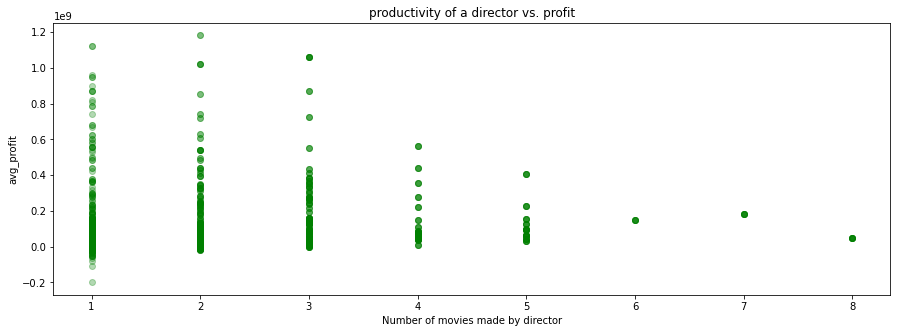

In [39]:
# Scatter plot of the relationship between directors' productivity and profit
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(individual_df['#movies_by_director'], individual_df['avg_profit'], alpha=0.3, color="green")
ax.set_title("productivity of a director vs. profit")
ax.set_xlabel("Number of movies made by director")
ax.set_ylabel("avg_profit");

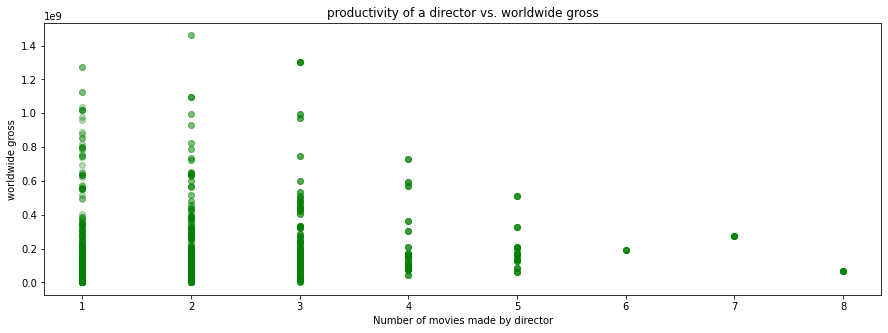

In [40]:
# Scatter plot of the relationship between directors' productivity and worldwide gross
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(individual_df['#movies_by_director'], individual_df['avg_world_gross'], alpha=0.3, color="green")
ax.set_title("productivity of a director vs. worldwide gross")
ax.set_xlabel("Number of movies made by director")
ax.set_ylabel("worldwide gross");

### Business Question 4: How much should we spend on these films?

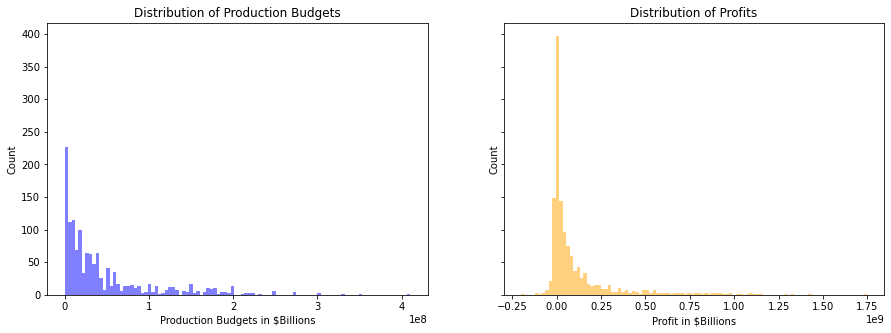

In [55]:
fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(15,5))
bins = 100
ax[0].hist(
    x=df['production_budget']

    ,bins=bins
    ,color='blue'
    ,alpha=0.5
)
ax[1].hist(
    x=df['profit']

    ,bins=bins
    ,color='orange'
    ,alpha=0.5
);

ax[0].set_title('Distribution of Production Budgets')
ax[0].set_xlabel('Production Budgets in $Billions')
ax[0].set_ylabel('Count')

ax[1].set_title('Distribution of Profits')
ax[1].set_xlabel('Profit in $Billions')
ax[1].set_ylabel('Count');

>Does the size of the production budget of a film correlate to the total profit? When analyzing the distribution of the two characteristics of our data, a striking similarity can be found between the two distributions. In the cell below we run a pearson correlation coefficient between the two variables to inquire more about the relationship between the two

In [56]:
df[['production_budget','profit']].corr()

production_budget    profit
production_budget           1.000000  0.658975
profit                      0.658975  1.000000

>A score of ~0.659 is an incation of a strong correlation between the amount of money spent and the amount of money made. 

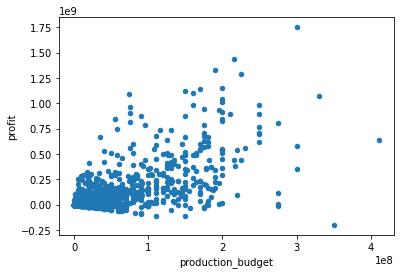

In [64]:
df.plot.scatter(x='production_budget',y='profit',colormap = 'viridis');

In this section we analyzed whether or not there is a correlation between production budget and profit to decide if a studio should focus on producing fewer movies with higher production quality than to make more, lower budget films. Based on the appearance of a strong positive correlation between production budget and profit **we reccomend any studio looking to make large returns focus on producing fewer movies with higher production quality, taking a quality over quantity approach.**